# Wczytywanie oraz przekształcenia danych

Na początku wczytuję pobrane dane z pliku csv

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('apartments_pl_2023_08.csv')

In [3]:
df.head()

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000


Najpierw usuwam niepotrzebne kolumny:
- id
- type
- floorCount
- latitude
- longtitude
- school/clinic/postOffice/kindergarten/restaurant/college/pharmacy-Distance
- ownership
- buildingMaterial
- condition

In [4]:
columns_to_drop = ['id', 'type', 'floorCount', 'latitude', 'longitude',
                   'schoolDistance', 'clinicDistance', 'postOfficeDistance', 'kindergartenDistance',
                   'restaurantDistance', 'collegeDistance', 'pharmacyDistance',
                   'ownership', 'buildingMaterial', 'condition']

In [5]:
df2 = df.drop(columns=columns_to_drop, axis=1)

In [6]:
df2.head()

,city,squareMeters,rooms,floor,buildYear,centreDistance,poiCount,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,szczecin,63.00,3.0,4.0,1980.0,6.53,9.0,yes,yes,yes,no,yes,415000
1,szczecin,36.00,2.0,8.0,NaN,2.15,16.0,no,yes,yes,no,yes,395995
2,szczecin,73.02,3.0,2.0,NaN,3.24,9.0,no,no,no,no,no,565000
3,szczecin,87.60,3.0,2.0,NaN,2.27,32.0,yes,yes,no,no,yes,640000
4,szczecin,66.00,3.0,1.0,NaN,4.07,1.0,no,no,no,no,no,759000


Przekształcam rok wybudowania budynku (buildYear) na wiek budynku (buildingAge)

In [7]:
df2['buildingAge'] = 2023 - df['buildYear']

In [8]:
df2 = df2.drop('buildYear', axis = 1)

Zamieniam kolumny hasParkingSpace, hasBalcony, hasSecurity, hasStorageRoom, hasElevator tak, aby 1 oznaczało ich obecność (yes), a 0 ich brak (no)

In [9]:
df2['hasParkingSpace'] = df2['hasParkingSpace'].replace({'yes': 1, 'no': 0})

In [10]:
df2['hasBalcony'] = df2['hasBalcony'].replace({'yes': 1, 'no': 0})

In [11]:
df2['hasSecurity'] = df2['hasSecurity'].replace({'yes': 1, 'no': 0})

In [12]:
df2['hasStorageRoom'] = df2['hasStorageRoom'].replace({'yes': 1, 'no': 0})

In [13]:
df2['hasElevator'] = df2['hasElevator'].replace({'yes': 1, 'no': 0})

Teraz chcę dodać kolumnę zawierającą gęstość zaludnienia danego miasta, w którym znajduje się mieszkanie. Dane do gęstości zaludnienia danych miast pobrałem z GUSu

In [14]:
df['city'].unique()

array(['szczecin', 'gdynia', 'krakow', 'poznan', 'bialystok', 'gdansk',
       'wroclaw', 'radom', 'rzeszow', 'lodz', 'katowice', 'lublin',
       'czestochowa', 'warszawa', 'bydgoszcz'], dtype=object)

In [15]:
density_df = pd.read_csv('dane_density.csv', sep=';')
print(density_df.sort_values(by='density', ascending=False))

           city  density
13     warszawa   3600.1
0     bialystok   2865.0
6        krakow   2457.6
14      wroclaw   2302.1
8        lublin   2246.5
7          lodz   2245.3
9        poznan   2066.8
1     bydgoszcz   1875.6
3        gdansk   1829.3
4        gdynia   1796.4
10        radom   1769.7
5      katowice   1700.9
11      rzeszow   1528.4
2   czestochowa   1304.0
12     szczecin   1302.5


In [16]:
df3 = pd.merge(df2, density_df, on='city', how='left')

Gdy mam już zmienną ciągłą o gęstości zaludnienia, przekształcam ją tak aby gęstość na przedziale 1000-2000 była poziomem bazowym, za przedział 2000-3000 odpowiada zmienna density_1, a za powyzej 3000 density_2. Na końcu usuwam zmienną density

In [17]:
df3['density_1'] = (df3['density'].between(2000, 3000)).astype(int)
df3['density_2'] = (df3['density'] > 3000).astype(int)

In [18]:
df3 = df3.drop('density', axis=1)

Dodaję również kwadrat wieku

In [19]:
df3['buildingAgesq'] = df3['buildingAge'] ** 2

Teraz sprawdzę braki danych w konkretnych zmiennych

In [20]:
df3.isnull().sum()

city                  0
squareMeters          0
rooms                 0
floor              3438
centreDistance        0
poiCount              0
hasParkingSpace       0
hasBalcony            0
hasElevator         926
hasSecurity           0
hasStorageRoom        0
price                 0
buildingAge        3271
density_1             0
density_2             0
buildingAgesq      3271
dtype: int64

In [21]:
df3['buildingAge'].value_counts()

buildingAge
1.0      966
43.0     738
53.0     715
0.0      702
2.0      401
        ... 
151.0      1
79.0       1
131.0      1
140.0      1
171.0      1
Name: count, Length: 155, dtype: int64

In [22]:
df3 = df3.dropna(subset=['buildingAge'])
df3.isnull().sum()

city                  0
squareMeters          0
rooms                 0
floor              2782
centreDistance        0
poiCount              0
hasParkingSpace       0
hasBalcony            0
hasElevator         524
hasSecurity           0
hasStorageRoom        0
price                 0
buildingAge           0
density_1             0
density_2             0
buildingAgesq         0
dtype: int64

In [23]:
df3['floor'].value_counts()

floor
1.0     3093
3.0     2691
2.0     2605
4.0     1910
5.0      764
6.0      427
7.0      326
8.0      300
10.0     239
9.0      237
11.0      86
12.0      47
14.0      33
13.0      29
15.0      27
17.0      22
18.0       4
20.0       3
29.0       3
16.0       2
19.0       2
22.0       1
24.0       1
Name: count, dtype: int64

In [24]:
df3 = df3.dropna(subset=['floor'])
df3.isnull().sum()

city                 0
squareMeters         0
rooms                0
floor                0
centreDistance       0
poiCount             0
hasParkingSpace      0
hasBalcony           0
hasElevator        372
hasSecurity          0
hasStorageRoom       0
price                0
buildingAge          0
density_1            0
density_2            0
buildingAgesq        0
dtype: int64

In [25]:
df3['hasElevator'].value_counts()

hasElevator
1.0    6370
0.0    6110
Name: count, dtype: int64

### W ten sposób otrzymałem ostateczną bazę na której przeprowadzać będę analizę

In [26]:
df3.head()

,city,squareMeters,rooms,floor,centreDistance,poiCount,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,buildingAge,density_1,density_2,buildingAgesq
0,szczecin,63.00,3.0,4.0,6.53,9.0,1,1,1.0,0,1,415000,43.0,0,0,1849.0
5,szczecin,63.30,3.0,2.0,4.48,10.0,1,1,0.0,0,1,499000,26.0,0,0,676.0
6,szczecin,47.45,2.0,2.0,2.99,18.0,0,0,1.0,0,1,370000,49.0,0,0,2401.0
7,szczecin,60.08,2.0,3.0,3.53,8.0,0,1,1.0,0,0,629000,14.0,0,0,196.0
8,szczecin,47.76,2.0,8.0,4.27,6.0,0,1,1.0,0,1,399000,43.0,0,0,1849.0


In [27]:
df3 = df3.dropna()

In [28]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df3[['price', 'squareMeters', 'buildingAge', 'buildingAgesq', 'centreDistance', 'poiCount', 'floor', 'rooms']].describe()

,price,squareMeters,buildingAge,buildingAgesq,centreDistance,poiCount,floor,rooms
count,12480.000,12480.000,12480.000,12480.000,12480.000,12480.000,12480.000,12480.000
mean,731308.887,59.776,37.444,2480.571,4.526,19.796,3.369,2.722
std,353679.363,21.357,32.842,3691.438,2.866,22.549,2.600,0.905
min,151200.000,25.000,0.000,0.000,0.020,0.000,1.000,1.000
25%,495000.000,45.395,9.000,81.000,2.200,7.000,2.000,2.000
50%,650000.000,56.000,32.000,1024.000,4.145,13.000,3.000,3.000
75%,875250.000,70.000,53.000,2809.000,6.310,23.000,4.000,3.000
max,2500000.000,150.000,172.000,29584.000,16.940,206.000,29.000,6.000


In [29]:
pd.reset_option('display.float_format')

# Zaczynam analizę statystyczną zmiennych
## Zacznę od zmiennych ciągłych

In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

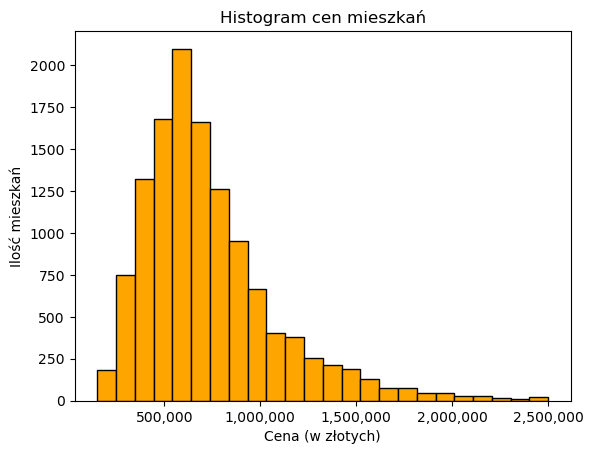

In [31]:
plt.hist(df3['price'], bins=24, color="orange", edgecolor='black')
plt.xlabel('Cena (w złotych)')
plt.ylabel('Ilość mieszkań')
plt.title('Histogram cen mieszkań')

# Funkcja formatująca etykiety osi x z separatorem tysięcy
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

In [32]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [34]:
test_price = sms.jarque_bera(df3['price'])
nam_jb = ['The Jarque-Bera test statistic', 'p-value', 'skewness', 'kurtosis']

In [35]:
lzip(nam_jb, test_price)

[('The Jarque-Bera test statistic', 10434.356953035907),
 ('p-value', 0.0),
 ('skewness', 1.5426200220697048),
 ('kurtosis', 6.247670693523166)]

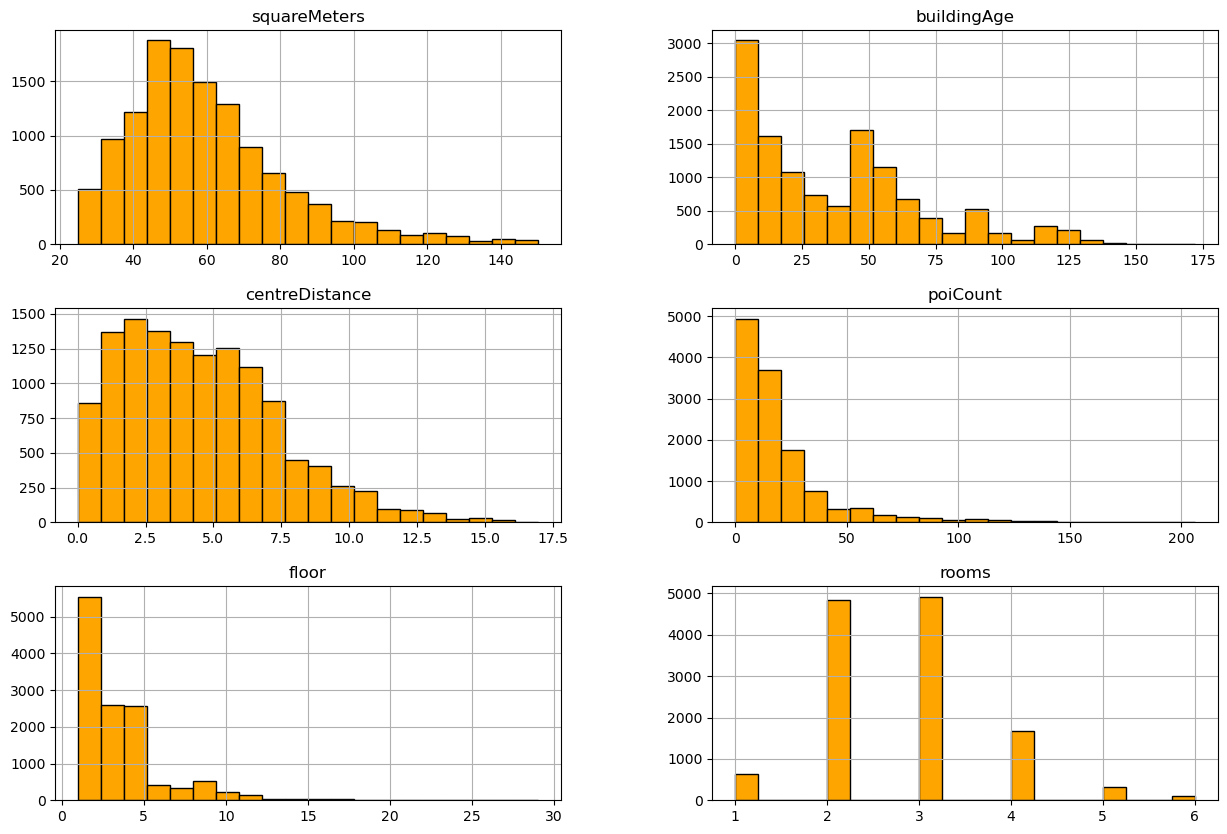

In [36]:
df3[['squareMeters', 'buildingAge', 'centreDistance', 'poiCount', 'floor', 'rooms']].hist(bins=20, figsize=(15, 10), color="orange", edgecolor='black')
plt.show()

In [37]:
zmienne_jb = ['squareMeters', 'buildingAge', 'centreDistance', 'poiCount', 'floor', 'rooms']

for n in zmienne_jb:
    test_result = sms.jarque_bera(df3[n])
    nam_jb = ['The Jarque-Bera test statistic', 'p-value', 'skewness', 'kurtosis']
    print(f"Test Jarque-Bera dla {n}:")
    print(lzip(nam_jb, test_result))
    print('\n')

Test Jarque-Bera dla squareMeters:
[('The Jarque-Bera test statistic', 4508.153769571867), ('p-value', 0.0), ('skewness', 1.1741347088118028), ('kurtosis', 4.776276223507929)]


Test Jarque-Bera dla buildingAge:
[('The Jarque-Bera test statistic', 1822.679094004708), ('p-value', 0.0), ('skewness', 0.9239755318495538), ('kurtosis', 3.3003813743036416)]


Test Jarque-Bera dla centreDistance:
[('The Jarque-Bera test statistic', 1347.3859507466782), ('p-value', 2.6233624529017525e-293), ('skewness', 0.7745630376387285), ('kurtosis', 3.437418828189253)]


Test Jarque-Bera dla poiCount:
[('The Jarque-Bera test statistic', 68478.52424155608), ('p-value', 0.0), ('skewness', 2.787141482448797), ('kurtosis', 13.030794540940047)]


Test Jarque-Bera dla floor:
[('The Jarque-Bera test statistic', 34287.27808317047), ('p-value', 0.0), ('skewness', 2.087967365881808), ('kurtosis', 9.964096664529912)]


Test Jarque-Bera dla rooms:
[('The Jarque-Bera test statistic', 1139.1419353392298), ('p-value', 4.

# Teraz zaczynam analizę

Najpierw sprawdzam typ moich zmiennych

In [38]:
df3.dtypes

city                object
squareMeters       float64
rooms              float64
floor              float64
centreDistance     float64
poiCount           float64
hasParkingSpace      int64
hasBalcony           int64
hasElevator        float64
hasSecurity          int64
hasStorageRoom       int64
price                int64
buildingAge        float64
density_1            int32
density_2            int32
buildingAgesq      float64
dtype: object

Teraz zbadam czy wszystkie zmienne nie posiadają błędnie wprowadzonych wartości

In [39]:
df3.describe()

,squareMeters,rooms,floor,centreDistance,poiCount,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,buildingAge,density_1,density_2,buildingAgesq
count,12480.000000,12480.000000,12480.000000,12480.000000,12480.000000,12480.000000,12480.000000,12480.000000,12480.000000,12480.000000,1.248000e+04,12480.000000,12480.000000,12480.000000,12480.000000
mean,59.775536,2.721715,3.368910,4.525555,19.796314,0.282131,0.663061,0.510417,0.112179,0.485497,7.313089e+05,37.444471,0.409135,0.327724,2480.570593
std,21.356781,0.904996,2.599807,2.865703,22.549160,0.450055,0.472683,0.499912,0.315600,0.499810,3.536794e+05,32.841568,0.491694,0.469403,3691.437932
min,25.000000,1.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.512000e+05,0.000000,0.000000,0.000000,0.000000
25%,45.395000,2.000000,2.000000,2.200000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.950000e+05,9.000000,0.000000,0.000000,81.000000
50%,56.000000,3.000000,3.000000,4.145000,13.000000,0.000000,1.000000,1.000000,0.000000,0.000000,6.500000e+05,32.000000,0.000000,0.000000,1024.000000
75%,70.000000,3.000000,4.000000,6.310000,23.000000,1.000000,1.000000,1.000000,0.000000,1.000000,8.752500e+05,53.000000,1.000000,1.000000,2809.000000
max,150.000000,6.000000,29.000000,16.940000,206.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.500000e+06,172.000000,1.000000,1.000000,29584.000000


Teraz będę chciał zbadać zależności pomiędzy zmiennymi ciągłymi

In [40]:
df_ciagle = df3[['squareMeters', 'rooms', 'floor', 'centreDistance', 'poiCount', 'buildingAge', 'buildingAgesq', 'price']]

In [41]:
import seaborn as sns

C:\Users\Komputer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Komputer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Komputer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Komputer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

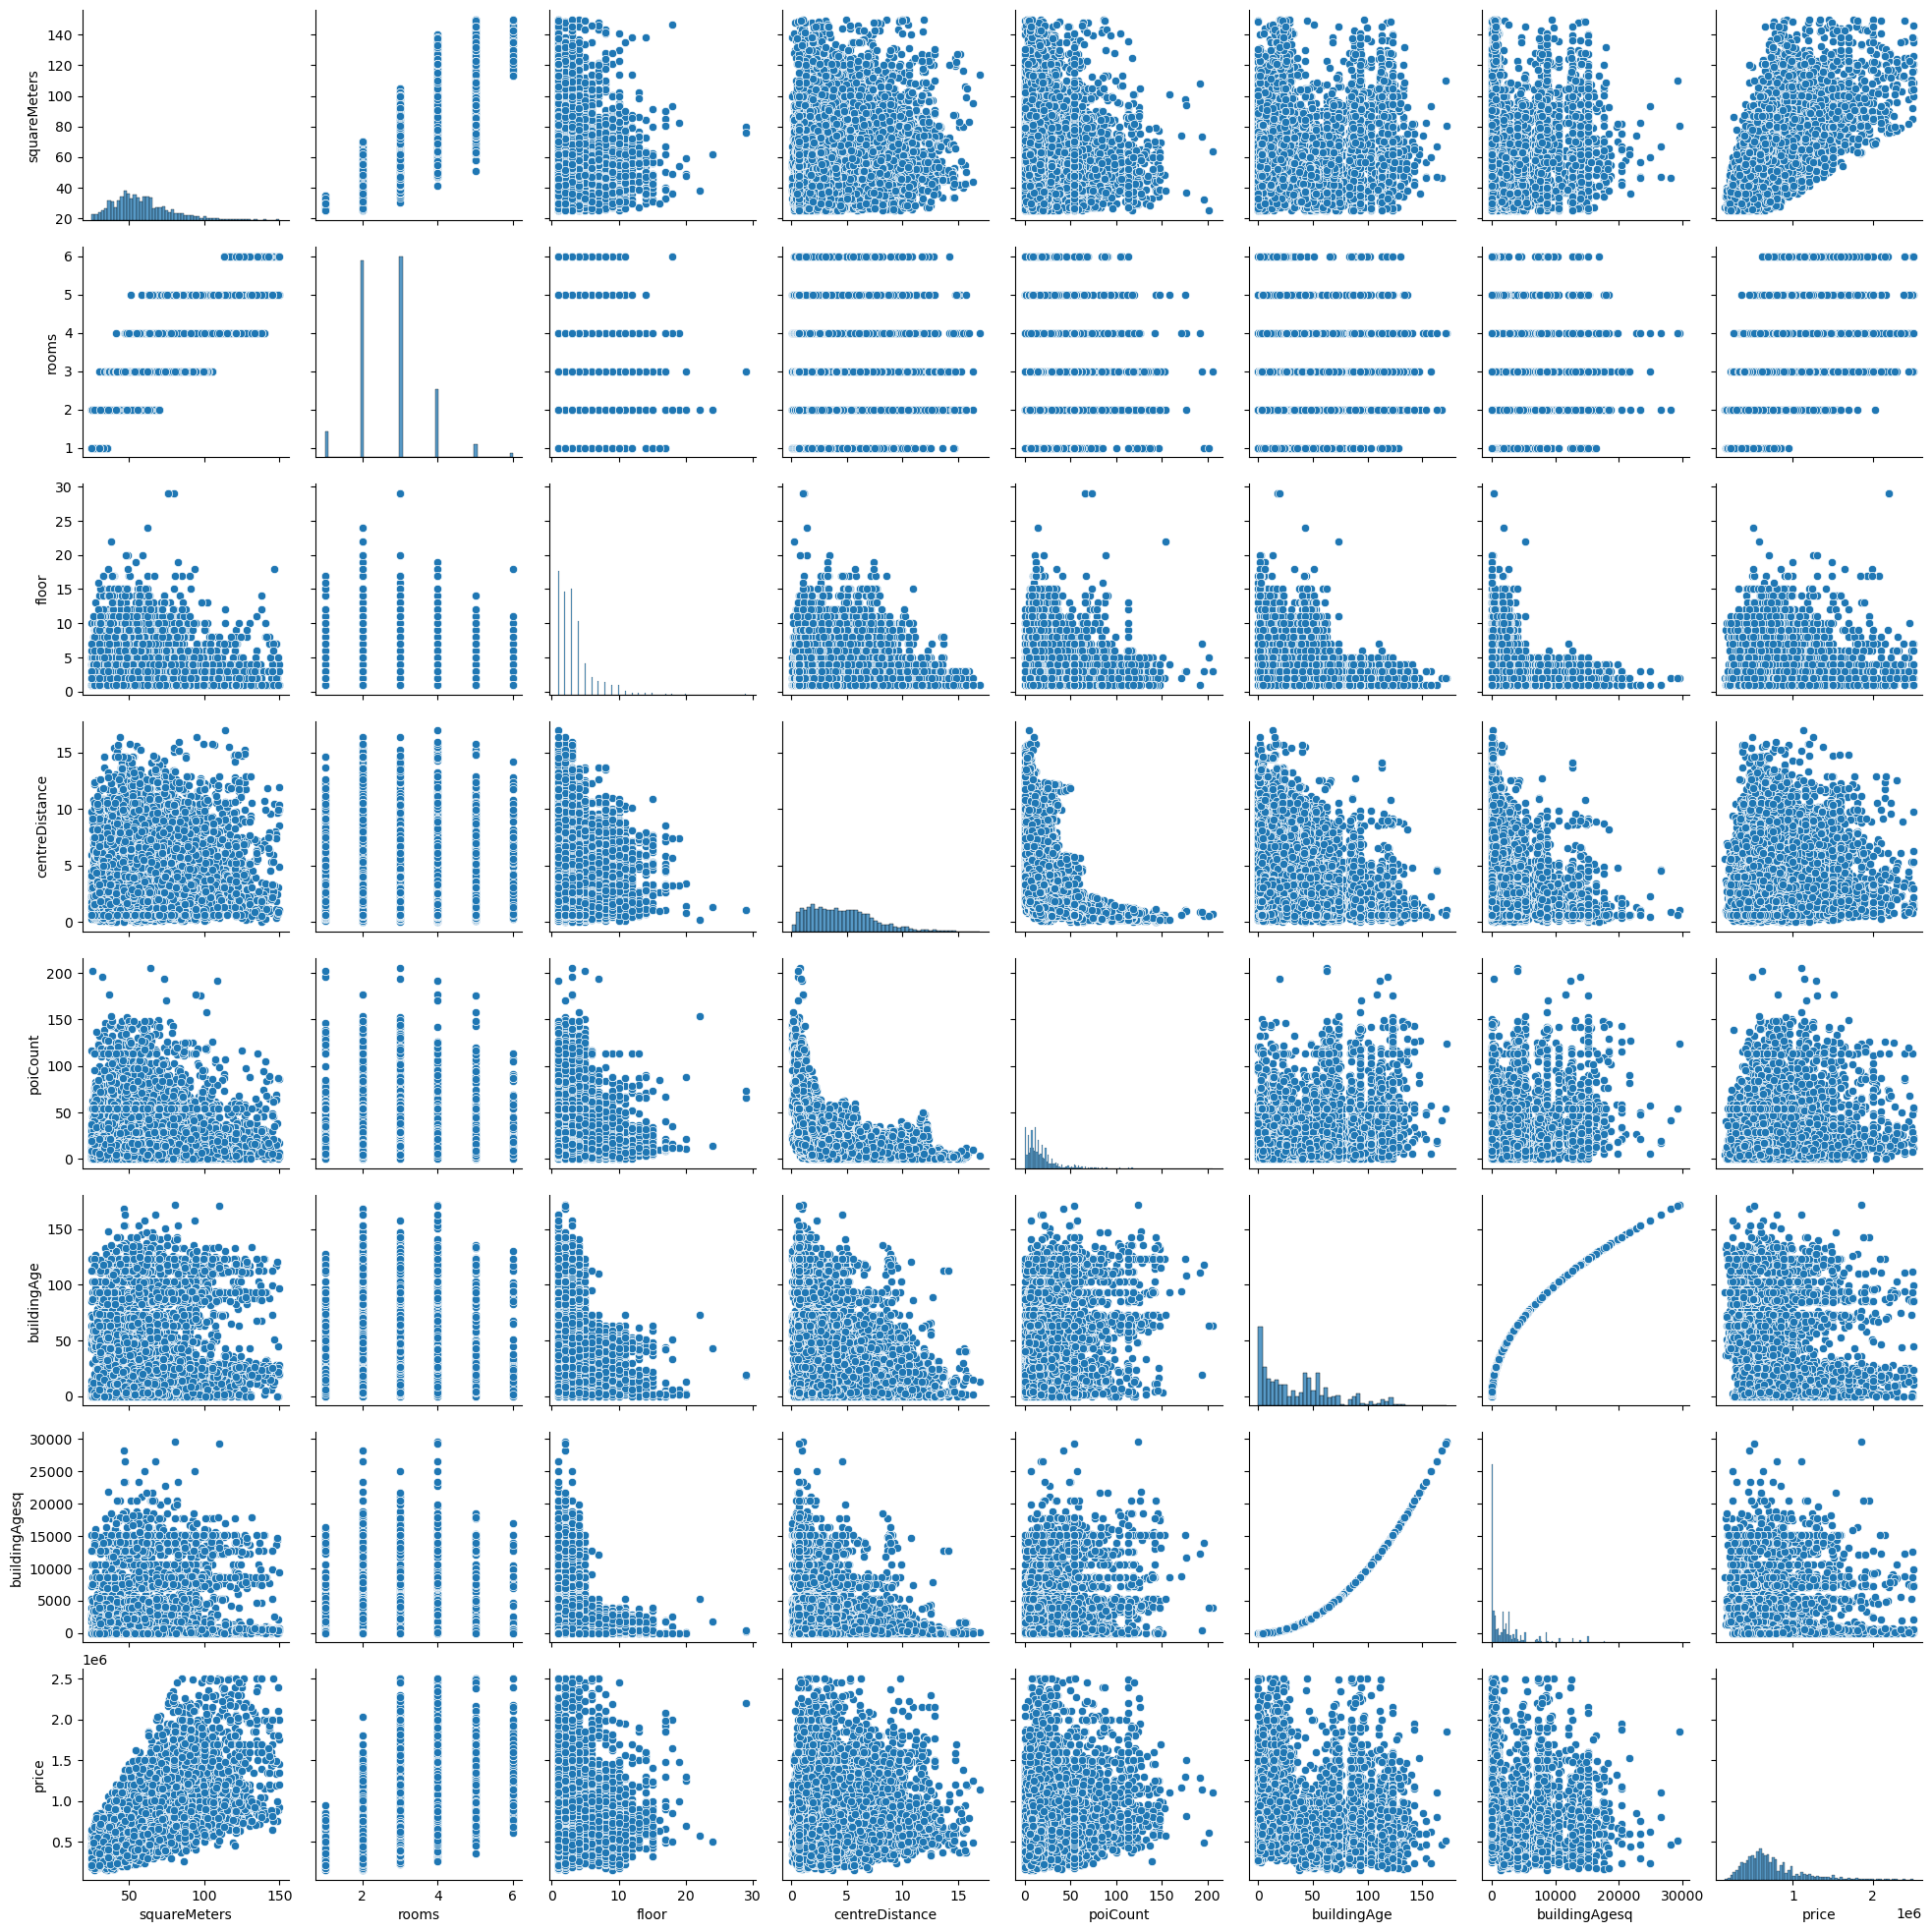

In [42]:
sns.pairplot(df_ciagle)

In [43]:
df_ciagle.corr(method = 'spearman')

,squareMeters,rooms,floor,centreDistance,poiCount,buildingAge,buildingAgesq,price
squareMeters,1.000000,0.824683,-0.080970,0.074100,-0.046885,-0.074385,-0.074385,0.624939
rooms,0.824683,1.000000,-0.044870,0.083347,-0.071879,-0.054381,-0.054381,0.491663
floor,-0.080970,-0.044870,1.000000,-0.035526,0.129178,0.009015,0.009015,-0.032642
centreDistance,0.074100,0.083347,-0.035526,1.000000,-0.499853,-0.348309,-0.348309,0.090210
poiCount,-0.046885,-0.071879,0.129178,-0.499853,1.000000,0.415558,0.415558,0.133649
buildingAge,-0.074385,-0.054381,0.009015,-0.348309,0.415558,1.000000,1.000000,-0.240690
buildingAgesq,-0.074385,-0.054381,0.009015,-0.348309,0.415558,1.000000,1.000000,-0.240690
price,0.624939,0.491663,-0.032642,0.090210,0.133649,-0.240690,-0.240690,1.000000


Zauważam, że ilość pokoi oraz metraż posiadają dość sporą korelację (ponad 80%)

C:\Users\Komputer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Komputer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Komputer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Komputer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


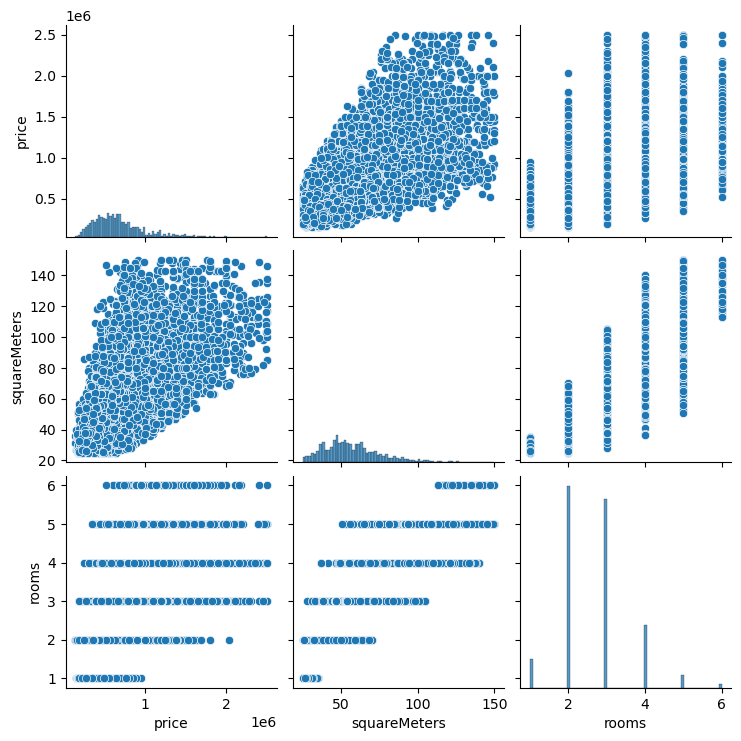

In [44]:
sns.pairplot(df[['price', 'squareMeters', 'rooms']])

<Axes: >

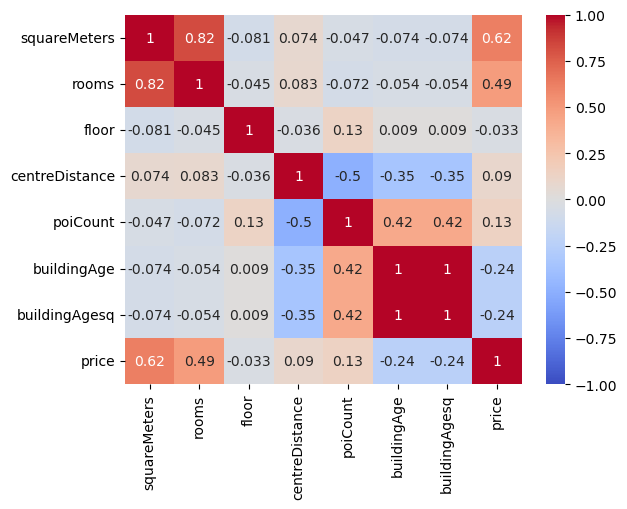

In [45]:
sns.heatmap(df_ciagle.corr(method = 'spearman'), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True)

Uznaję że zmienne squareMeters oraz rooms są na tyle skolerowane, że postanawiam użyć tylko zmiennej squareMeters (ma ona większą korelację z price)

# Analiza ekonometryczna

In [46]:
import statsmodels.formula.api as smf

In [47]:
m1 = smf.ols(formula = 'price ~ squareMeters + floor + centreDistance + poiCount + hasBalcony + hasSecurity + hasStorageRoom + hasElevator + hasParkingSpace + buildingAge + buildingAgesq + density_1 + density_2', data = df3).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     1760.
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:20:08   Log-Likelihood:            -1.7065e+05
No. Observations:               12480   AIC:                         3.413e+05
Df Residuals:                   12466   BIC:                         3.414e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         1.29e+05   1.02e+04     12.688      0.000    1.09e+05    1.49e+05
squareMeters     9991.9995     91.391    109.332      0.000    9812.858    1.02e+04
floor            -954.6315    791.509     -1.206      0.228   -2506.111     596.848
centreDistance  -1.392e+04    863.225    -16.125      0.000   -1.56e+04   -1.22e+04
poiCount         2748.0519    103.559     26.536      0.000    2545.060    2951.043
hasBalcony       9173.8934   4236.455      2.165      0.030     869.788    1.75e+04
hasSecurity      1.605e+04   6218.937      2.581      0.010    3862.372    2.82e+04
hasStorageRoom  -1.046e+04   4498.718     -2.326      0.020   -1.93e+04   -1646.389
hasElevator      6.195e+04   4622.531     13.401      0.000    5.29e+04     7.1e+04
hasParkingSpace  2832.9795   4396.993      0.644      0.519   -5785.804    1.15e+04
buildingAge     -6053.8384    203.445    -29.757      0.000   -6452.623   -5655.054
buildingAgesq      40.7623      1.656     24.615      0.000      37.516      44.008
density_1        2.433e+04   4757.471      5.114      0.000     1.5e+04    3.37e+04
density_2        2.966e+05   5611.597     52.856      0.000    2.86e+05    3.08e+05
==============================================================================
Omnibus:                     2001.220   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5648.599
Skew:                           0.860   Prob(JB):                         0.00
Kurtosis:                       5.812   Cond. No.                     2.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Sprawdzę teraz hipotezę, że zmienne hasParkingSpace jest zmienną nieistotną

In [48]:
hip1 = '(hasParkingSpace = 0)'
m1.f_test(hip1)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.41512167133770156, p=0.5193931820998527, df_denom=1.25e+04, df_num=1>

P-value > 0.05, więc brak podstaw do odrzucenia H0. Oznacza to że zmienna jest nieistotna - wyrzucam ją z modelu

In [49]:
m2 = smf.ols(formula = 'price ~ squareMeters + floor + centreDistance + poiCount + hasBalcony + hasSecurity + hasStorageRoom + hasElevator + buildingAge + buildingAgesq + density_1 + density_2', data = df3).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     1907.
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:20:16   Log-Likelihood:            -1.7065e+05
No. Observations:               12480   AIC:                         3.413e+05
Df Residuals:                   12467   BIC:                         3.414e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.295e+05   1.01e+04     12.775      0.000     1.1e+05    1.49e+05
squareMeters    9998.1744     90.885    110.009      0.000    9820.025    1.02e+04
floor           -965.1195    791.323     -1.220      0.223   -2516.234     585.995
centreDistance -1.391e+04    863.044    -16.116      0.000   -1.56e+04   -1.22e+04
poiCount        2747.8620    103.556     26.535      0.000    2544.876    2950.848
hasBalcony      9148.5464   4236.173      2.160      0.031     844.994    1.75e+04
hasSecurity     1.604e+04   6218.774      2.580      0.010    3853.456    2.82e+04
hasStorageRoom -1.024e+04   4484.709     -2.283      0.022    -1.9e+04   -1446.137
hasElevator     6.205e+04   4619.410     13.433      0.000     5.3e+04    7.11e+04
buildingAge    -6076.8625    200.278    -30.342      0.000   -6469.437   -5684.288
buildingAgesq     40.9028      1.642     24.918      0.000      37.685      44.120
density_1       2.473e+04   4716.501      5.244      0.000    1.55e+04     3.4e+04
density_2        2.97e+05   5581.699     53.205      0.000    2.86e+05    3.08e+05
==============================================================================
Omnibus:                     1999.313   Durbin-Watson:                   1.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5643.019
Skew:                           0.859   Prob(JB):                         0.00
Kurtosis:                       5.811   Cond. No.                     2.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Sprawdzę teraz łączną nieistotność zmiennych hasParkingSpace oraz floor

In [50]:
hip2 = '(hasParkingSpace = 0), (floor = 0)'
m1.f_test(hip2)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.9512721915862012, p=0.386277363978042, df_denom=1.25e+04, df_num=2>

Wyszła łączna nieistotność tych zmiennych - usuwam kolejną zmienną z modelu

In [51]:
m3 = smf.ols(formula = 'price ~ squareMeters + centreDistance + poiCount + hasBalcony + hasSecurity + hasStorageRoom + hasElevator + buildingAge + buildingAgesq + density_1 + density_2', data = df3).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     2080.
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:20:24   Log-Likelihood:            -1.7065e+05
No. Observations:               12480   AIC:                         3.413e+05
Df Residuals:                   12468   BIC:                         3.414e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.276e+05      1e+04     12.740      0.000    1.08e+05    1.47e+05
squareMeters        1e+04     90.872    110.047      0.000    9822.082    1.02e+04
centreDistance -1.386e+04    862.085    -16.076      0.000   -1.55e+04   -1.22e+04
poiCount        2745.9768    103.547     26.519      0.000    2543.010    2948.944
hasBalcony      9195.0933   4236.084      2.171      0.030     891.716    1.75e+04
hasSecurity     1.643e+04   6211.012      2.644      0.008    4250.468    2.86e+04
hasStorageRoom -1.027e+04   4484.719     -2.290      0.022   -1.91e+04   -1478.299
hasElevator     6.021e+04   4364.847     13.794      0.000    5.17e+04    6.88e+04
buildingAge    -6120.6426    197.038    -31.063      0.000   -6506.868   -5734.417
buildingAgesq     41.2831      1.612     25.615      0.000      38.124      44.442
density_1       2.482e+04   4716.053      5.263      0.000    1.56e+04    3.41e+04
density_2       2.967e+05   5577.912     53.196      0.000    2.86e+05    3.08e+05
==============================================================================
Omnibus:                     1993.007   Durbin-Watson:                   1.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5618.844
Skew:                           0.857   Prob(JB):                         0.00
Kurtosis:                       5.805   Cond. No.                     2.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Teraz wszystkie zmienne są istotne

In [52]:
from stargazer.stargazer import Stargazer

In [53]:
tabela = Stargazer([m1, m2, m3])
tabela

In [54]:
tabela.covariate_order(['Intercept', 'squareMeters', 'buildingAge', 'buildingAgesq', 'centreDistance', 'poiCount', 'floor',
                       'density_1', 'density_2', 'hasBalcony', 'hasElevator', 'hasParkingSpace', 'hasSecurity', 'hasStorageRoom'])
tabela

Moim ostatecznym modelem jest m3. Przeprowadzę teraz na nim testy diagnostyczne

# Testy diagnostyczne
## Test RESET

In [55]:
import pylab as plt

In [56]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [57]:
sms.linear_reset(m3, power = 3, test_type='fitted')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=101809.78182986073, p-value=0.0, df_denom=2>

Hipoteza zerowa o liniowości formy funkcyjnej została odrzucona

## Test Chowa

In [58]:
m4 = smf.ols(formula = 'price ~ squareMeters + centreDistance + poiCount + hasBalcony + hasStorageRoom + hasElevator + buildingAge + buildingAgesq + density_1 + density_2', data = df3).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     2286.
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:20:58   Log-Likelihood:            -1.7065e+05
No. Observations:               12480   AIC:                         3.413e+05
Df Residuals:                   12469   BIC:                         3.414e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.297e+05   9985.700     12.989      0.000     1.1e+05    1.49e+05
squareMeters    1.001e+04     90.797    110.260      0.000    9833.300    1.02e+04
centreDistance -1.382e+04    862.163    -16.029      0.000   -1.55e+04   -1.21e+04
poiCount        2742.9106    103.565     26.485      0.000    2539.907    2945.914
hasBalcony      9279.3099   4236.982      2.190      0.029     974.172    1.76e+04
hasStorageRoom -1.055e+04   4484.575     -2.352      0.019   -1.93e+04   -1755.329
hasElevator     6.059e+04   4363.549     13.885      0.000     5.2e+04    6.91e+04
buildingAge    -6195.8694    195.021    -31.770      0.000   -6578.140   -5813.598
buildingAgesq     41.7807      1.601     26.096      0.000      38.642      44.919
density_1       2.479e+04   4717.174      5.255      0.000    1.55e+04     3.4e+04
density_2       2.981e+05   5556.550     53.640      0.000    2.87e+05    3.09e+05
==============================================================================
Omnibus:                     1985.198   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5585.773
Skew:                           0.855   Prob(JB):                         0.00
Kurtosis:                       5.797   Cond. No.                     2.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
m4_1 = smf.ols(formula = 'price ~ squareMeters + centreDistance + poiCount + hasBalcony + hasStorageRoom + hasElevator + buildingAge + buildingAgesq + density_1 + density_2', data = df3[df3['hasSecurity'] == 0]).fit()
m4_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     1946.
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:21:02   Log-Likelihood:            -1.5139e+05
No. Observations:               11080   AIC:                         3.028e+05
Df Residuals:                   11069   BIC:                         3.029e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.326e+05   1.05e+04     12.627      0.000    1.12e+05    1.53e+05
squareMeters    9810.1405     96.486    101.674      0.000    9621.010    9999.271
centreDistance -1.215e+04    916.922    -13.251      0.000   -1.39e+04   -1.04e+04
poiCount        2644.2717    106.829     24.752      0.000    2434.868    2853.676
hasBalcony      7008.4623   4422.187      1.585      0.113   -1659.813    1.57e+04
hasStorageRoom -1.156e+04   4690.953     -2.464      0.014   -2.08e+04   -2364.606
hasElevator     5.333e+04   4532.420     11.767      0.000    4.44e+04    6.22e+04
buildingAge    -6221.7701    203.013    -30.647      0.000   -6619.712   -5823.829
buildingAgesq     42.3675      1.654     25.613      0.000      39.125      45.610
density_1       3.725e+04   4869.331      7.650      0.000    2.77e+04    4.68e+04
density_2       3.036e+05   5854.596     51.851      0.000    2.92e+05    3.15e+05
==============================================================================
Omnibus:                     1941.467   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5858.546
Skew:                           0.913   Prob(JB):                         0.00
Kurtosis:                       6.059   Cond. No.                     2.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
m4_2 = smf.ols(formula = 'price ~ squareMeters + centreDistance + poiCount + hasBalcony + hasStorageRoom + hasElevator + buildingAge + buildingAgesq + density_1 + density_2', data = df3[df3['hasSecurity'] == 1]).fit()
m4_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     308.1
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:21:05   Log-Likelihood:                -19161.
No. Observations:                1400   AIC:                         3.834e+04
Df Residuals:                    1389   BIC:                         3.840e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         1.4e+05   3.11e+04      4.495      0.000    7.89e+04    2.01e+05
squareMeters    1.122e+04    260.248     43.119      0.000    1.07e+04    1.17e+04
centreDistance -2.379e+04   2475.234     -9.611      0.000   -2.86e+04   -1.89e+04
poiCount        3815.1182    383.001      9.961      0.000    3063.796    4566.441
hasBalcony      1.775e+04   1.37e+04      1.294      0.196   -9160.283    4.47e+04
hasStorageRoom  5308.0604   1.42e+04      0.375      0.708   -2.25e+04    3.31e+04
hasElevator     1.087e+05   1.51e+04      7.205      0.000    7.91e+04    1.38e+05
buildingAge    -5715.8521    797.342     -7.169      0.000   -7279.977   -4151.727
buildingAgesq     36.8925      6.829      5.403      0.000      23.497      50.288
density_1      -1.191e+05    1.7e+04     -6.995      0.000   -1.52e+05   -8.57e+04
density_2       2.185e+05   1.74e+04     12.542      0.000    1.84e+05    2.53e+05
==============================================================================
Omnibus:                      132.376   Durbin-Watson:                   1.607
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.062
Skew:                           0.607   Prob(JB):                     2.05e-57
Kurtosis:                       4.733   Cond. No.                     1.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
licznik = (m4.ssr - m4_1.ssr - m4_2.ssr)/len(m4.params)*(2-1)

In [62]:
mianownik = (m4_1.ssr + m4_2.ssr)/(m3.nobs - 2*len(m4.params))

In [63]:
F = licznik/mianownik
F

18.268037924611587

In [64]:
import scipy.stats

In [65]:
scipy.stats.f.ppf(q = 1-0.05, dfn = len(m4.params)*(2-1), dfd = (m3.nobs - 2*len(m4.params)))

1.7894153058445654

H0 o stabilnych parametrach w podbróbkach zostałą odrzucona

Należy zmienić formę funkcyjną

## Homoskedastyczność

In [67]:
test1 = sms.het_breuschpagan(m3.resid, m3.model.exog)

In [68]:
nazwy = ['lagrange multiplier statistic', 'pvalue', 'f-statistics', 'pvalue']
lzip(nazwy, test1)

[('lagrange multiplier statistic', 2121.5129192063714),
 ('pvalue', 0.0),
 ('f-statistics', 232.14186036623107),
 ('pvalue', 0.0)]

Odrzucamy hipotezę o homoskedastyczności - jest heteroskedastyczność

In [69]:
test2 = sms.het_white(m3.resid, m3.model.exog)
lzip(nazwy, test2)

[('lagrange multiplier statistic', 2921.7291920888733),
 ('pvalue', 0.0),
 ('f-statistics', 54.97728889703761),
 ('pvalue', 0.0)]

## Test na normalność

In [70]:
test5 = sms.jarque_bera(m3.resid)
nam2 = ['The Jarque-Bera test statistic', 'p-value', 'skewness', 'kurtosis']
lzip(nam2, test5)

[('The Jarque-Bera test statistic', 5618.844027080973),
 ('p-value', 0.0),
 ('skewness', 0.857013854717469),
 ('kurtosis', 5.804920372156266)]

In [71]:
import statsmodels.api as sm

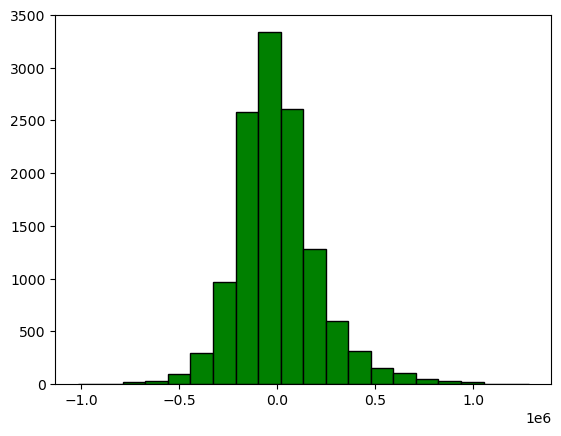

In [72]:
plt.hist(m3.resid, bins = 20, color = 'green', edgecolor = 'black')
plt.show()

# Obserwacje odstające

In [73]:
h_lev = (2*len(m3.params))/m3.nobs

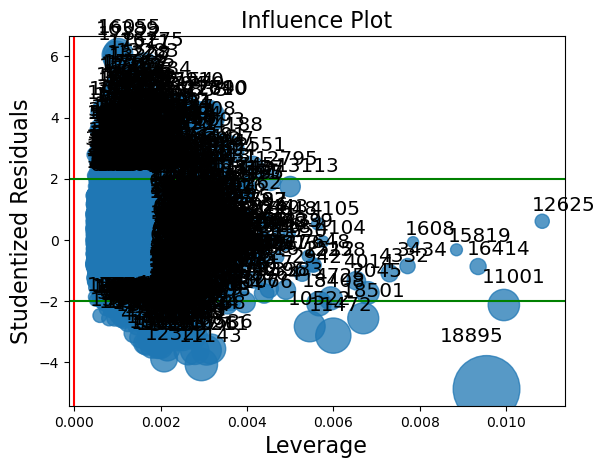

In [74]:
sm.graphics.influence_plot(m3, criterion = 'Cooks')
plt.axvline(x = round(h_lev, 2), color = 'red')
plt.axhline(y=2, color = 'green')
plt.axhline(y=-2, color = 'green')
plt.show()

In [75]:
cooks = m3.get_influence().cooks_distance[0]

In [76]:
mean_cooks = cooks.mean()

In [77]:
df3['index_column'] = df3.index

In [78]:
df3['cooks'] = m3.get_influence().cooks_distance[0]

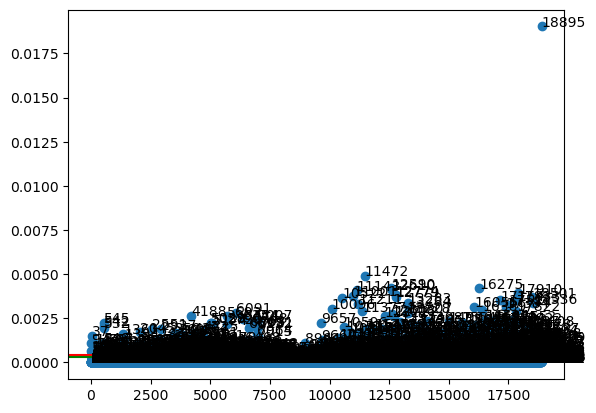

In [79]:
plt.scatter(df3['index_column'], df3['cooks'])
plt.axhline(y=4*mean_cooks, color = 'r')
plt.axhline(y=4/m3.nobs, color = 'g')
for idx, row in df3.iterrows():
    plt.annotate(row['index_column'], (row['index_column'], row['cooks']))

In [80]:
df3[df3['cooks']>4*mean_cooks].sort_values(by='cooks', ascending = False)

,city,squareMeters,rooms,floor,centreDistance,poiCount,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,buildingAge,density_1,density_2,buildingAgesq,index_column,cooks
18895,bydgoszcz,110.07,4.0,2.0,0.65,54.0,0,0,0.0,0,0,510000,171.0,0,0,29241.0,18895,0.019030
11472,katowice,93.42,4.0,3.0,0.47,57.0,0,0,0.0,0,0,620000,158.0,0,0,24964.0,11472,0.004920
12590,warszawa,125.00,5.0,3.0,1.54,6.0,1,1,1.0,1,0,2390000,94.0,0,1,8836.0,12590,0.004208
16275,warszawa,85.00,3.0,1.0,1.84,29.0,0,0,0.0,0,0,2499000,0.0,0,1,0.0,16275,0.004196
12610,warszawa,125.00,5.0,3.0,1.45,8.0,0,1,1.0,1,0,2390000,94.0,0,1,8836.0,12610,0.004100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5744,gdansk,83.92,3.0,1.0,0.61,60.0,0,1,0.0,0,1,1400000,93.0,0,0,8649.0,5744,0.000413
12493,warszawa,112.80,4.0,2.0,1.19,73.0,1,1,1.0,0,0,2050000,25.0,0,1,625.0,12493,0.000412
1579,krakow,50.65,2.0,3.0,1.50,57.0,0,0,0.0,0,1,1114000,15.0,1,0,225.0,1579,0.000411
15808,warszawa,120.00,6.0,1.0,14.18,0.0,0,0,0.0,0,0,1077000,5.0,0,1,25.0,15808,0.000409


# Próba naprawienia niespełnionych założeń KMRL
## Zacznę od niepoprawnej formy funkcyjnej

Sprawdzmy czy zmienna price będzie miała rozkład normalny w przypadku zastosowania logarytmu

In [81]:
import numpy as np

In [82]:
df3['log_price'] = np.log(df3['price'])

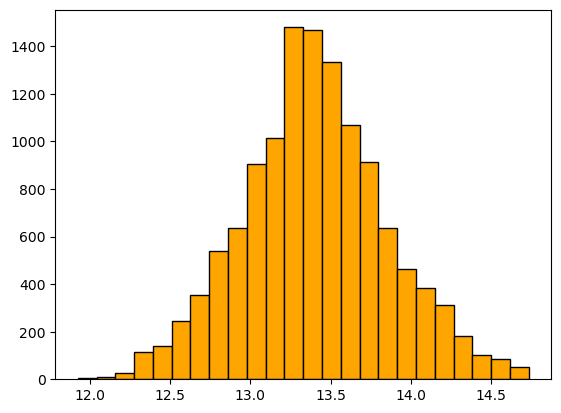

In [83]:
plt.hist(df3['log_price'], bins=24, color="orange", edgecolor='black')
plt.show()

W celu naprawienia niepoprawnej formy funkcyjnej postaram się zlogarytmować zmienną objaśnianą price

In [84]:
m3_adj = smf.ols(formula = 'log_price ~ squareMeters + centreDistance + poiCount + hasBalcony + hasSecurity + hasStorageRoom + hasElevator + buildingAge + buildingAgesq + density_1 + density_2', data = df3).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     2080.
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:25:51   Log-Likelihood:            -1.7065e+05
No. Observations:               12480   AIC:                         3.413e+05
Df Residuals:                   12468   BIC:                         3.414e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.276e+05      1e+04     12.740      0.000    1.08e+05    1.47e+05
squareMeters        1e+04     90.872    110.047      0.000    9822.082    1.02e+04
centreDistance -1.386e+04    862.085    -16.076      0.000   -1.55e+04   -1.22e+04
poiCount        2745.9768    103.547     26.519      0.000    2543.010    2948.944
hasBalcony      9195.0933   4236.084      2.171      0.030     891.716    1.75e+04
hasSecurity     1.643e+04   6211.012      2.644      0.008    4250.468    2.86e+04
hasStorageRoom -1.027e+04   4484.719     -2.290      0.022   -1.91e+04   -1478.299
hasElevator     6.021e+04   4364.847     13.794      0.000    5.17e+04    6.88e+04
buildingAge    -6120.6426    197.038    -31.063      0.000   -6506.868   -5734.417
buildingAgesq     41.2831      1.612     25.615      0.000      38.124      44.442
density_1       2.482e+04   4716.053      5.263      0.000    1.56e+04    3.41e+04
density_2       2.967e+05   5577.912     53.196      0.000    2.86e+05    3.08e+05
==============================================================================
Omnibus:                     1993.007   Durbin-Watson:                   1.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5618.844
Skew:                           0.857   Prob(JB):                         0.00
Kurtosis:                       5.805   Cond. No.                     2.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ponownie przeprowadzam test RESET

In [85]:
sms.linear_reset(m3_adj, power = 3, test_type='fitted')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=251.62676975174236, p-value=2.290557502479792e-55, df_denom=2>

Ponownie przeprowadzam test Chowa

In [86]:
m4_adj = smf.ols(formula = 'log_price ~ squareMeters + centreDistance + poiCount + hasBalcony + hasStorageRoom + hasElevator + buildingAge + buildingAgesq + density_1 + density_2', data = df3).fit()

In [87]:
m4_1_adj = smf.ols(formula = 'log_price ~ squareMeters + centreDistance + poiCount + hasBalcony + hasStorageRoom + hasElevator + buildingAge + buildingAgesq + density_1 + density_2', data = df3[df3['hasSecurity'] == 0]).fit()

In [88]:
m4_2_adj = smf.ols(formula = 'log_price ~ squareMeters + centreDistance + poiCount + hasBalcony + hasStorageRoom + hasElevator + buildingAge + buildingAgesq + density_1 + density_2', data = df3[df3['hasSecurity'] == 1]).fit()

In [89]:
mianownik_adj = (m4_1_adj.ssr + m4_2_adj.ssr)/(m3.nobs - 2*len(m4_adj.params))
licznik_adj = (m4_adj.ssr - m4_1_adj.ssr - m4_2_adj.ssr)/len(m4_adj.params)*(2-1)

In [90]:
F_adj = licznik_adj/mianownik_adj
F_adj

16.002185469564168

In [91]:
scipy.stats.f.ppf(q = 1-0.05, dfn = len(m4_adj.params)*(2-1), dfd = (m3.nobs - 2*len(m4_adj.params)))

1.7894153058445654

## Teraz w celu naprawienia heteroskedastyczności zastosuję macierz odporną White'a

In [92]:
m3_white = smf.ols(formula = 'price ~ squareMeters + centreDistance + poiCount + hasBalcony + hasSecurity + hasStorageRoom + hasElevator + buildingAge + buildingAgesq + density_1 + density_2', data = df3).fit(cov_type = 'HC0')
m3_white.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     1134.
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:26:48   Log-Likelihood:            -1.7065e+05
No. Observations:               12480   AIC:                         3.413e+05
Df Residuals:                   12468   BIC:                         3.414e+05
Df Model:                          11                                         
Covariance Type:                  HC0                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.276e+05    1.1e+04     11.625      0.000    1.06e+05    1.49e+05
squareMeters        1e+04    129.760     77.067      0.000    9745.880    1.03e+04
centreDistance -1.386e+04    959.566    -14.443      0.000   -1.57e+04    -1.2e+04
poiCount        2745.9768    125.695     21.846      0.000    2499.618    2992.335
hasBalcony      9195.0933   4420.382      2.080      0.038     531.303    1.79e+04
hasSecurity     1.643e+04   6625.787      2.479      0.013    3438.705    2.94e+04
hasStorageRoom -1.027e+04   4526.587     -2.269      0.023   -1.91e+04   -1397.092
hasElevator     6.021e+04   4186.892     14.381      0.000     5.2e+04    6.84e+04
buildingAge    -6120.6426    220.620    -27.743      0.000   -6553.050   -5688.236
buildingAgesq     41.2831      1.990     20.745      0.000      37.383      45.184
density_1       2.482e+04   4512.755      5.500      0.000     1.6e+04    3.37e+04
density_2       2.967e+05   6327.047     46.897      0.000    2.84e+05    3.09e+05
==============================================================================
Omnibus:                     1993.007   Durbin-Watson:                   1.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5618.844
Skew:                           0.857   Prob(JB):                         0.00
Kurtosis:                       5.805   Cond. No.                     2.46e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 2.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
Stargazer([m3, m3_white])

# Problem współliniowości

In [94]:
def get_vif(exogs, data):
    '''Return VIF (variance inflation factor) DataFrame

    Args:
    exogs (list): list of exogenous/independent variables
    data (DataFrame): the df storing all variables

    Returns:
    VIF and Tolerance DataFrame for each exogenous variable

    Notes:
    Assume we have a list of exogenous variable [X1, X2, X3, X4].
    To calculate the VIF and Tolerance for each variable, we regress
    each of them against other exogenous variables. For instance, the
    regression model for X3 is defined as:
                        X3 ~ X1 + X2 + X4
    And then we extract the R-squared from the model to calculate:
                    VIF = 1 / (1 - R-squared)
                    Tolerance = 1 - R-squared
    The cutoff to detect multicollinearity:
                    VIF > 10 or Tolerance < 0.1
    '''

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # create formula for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"

        # extract r-squared from the fit
        r_squared = smf.ols(formula, data=data).fit().rsquared

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif


In [95]:
m3.params

Intercept         127595.105739
squareMeters       10000.205077
centreDistance    -13858.774955
poiCount            2745.976812
hasBalcony          9195.093306
hasSecurity        16425.008817
hasStorageRoom    -10269.039964
hasElevator        60209.605709
buildingAge        -6120.642637
buildingAgesq         41.283119
density_1          24818.536299
density_2         296722.379655
dtype: float64

In [96]:
zmienne = ['squareMeters', 'centreDistance', 'poiCount', 'buildingAge']

In [97]:
get_vif(exogs = zmienne, data = df3)

,VIF,Tolerance
squareMeters,1.008092,0.991973
centreDistance,1.346987,0.742398
poiCount,1.367476,0.731274
buildingAge,1.232362,0.811450


brak korelacji